In [45]:
import pandas as pd
import geopandas as gpd
import h5py
import glob
import os
import matplotlib.pyplot as plt

In [38]:

hdf5_flist = glob.glob('./Outputs/*.h5')
f = h5py.File(hdf5_flist[0], 'r')

In [39]:
f

<HDF5 file "ATL06_20181230235825_00390203_001_01.h5" (mode r)>

In [40]:
D6 = f['gt1r']
iceseg_D6 = D6['land_ice_segments']

In [41]:
iceseg_D6.keys()

<KeysViewHDF5 ['atl06_quality_summary', 'delta_time', 'h_li', 'h_li_sigma', 'latitude', 'longitude', 'segment_id', 'sigma_geo_h', 'bias_correction', 'dem', 'fit_statistics', 'geophysical', 'ground_track']>

In [42]:
h_li = iceseg_D6['h_li']


In [43]:
iceseg_D6['geophysical'].keys()

<KeysViewHDF5 ['bckgrd', 'bsnow_conf', 'bsnow_h', 'bsnow_od', 'cloud_flg_asr', 'cloud_flg_atm', 'dac', 'e_bckgrd', 'msw_flag', 'neutat_delay_total', 'r_eff', 'solar_azimuth', 'solar_elevation', 'tide_earth', 'tide_load', 'tide_ocean', 'tide_pole']>

In [46]:
df = pd.DataFrame(columns = ['h_li','lat','lon'])

df['h_li'] = h_li
df['lat'] = iceseg_D6['latitude']
df['lon'] = iceseg_D6['longitude']
# df=df.head(1000)
# df = df.reset_index(drop=True)


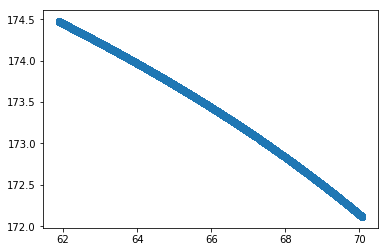

In [49]:
plt.scatter(df['lat'], df['lon'])
plt.show()